<a href="https://colab.research.google.com/github/Lindywyt/Lindywyt/blob/main/Predictive_diabetes_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predictive Modelling for Diabetic Diagnosis in Pima Indians**

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. Pima Indians are thr North American Indians who traditionally lived along Gila and Salt River in Arizona, U,S.

Diabetes is a chronic (long-lasting) medical disorder that affects how the body uses food as fuel. The body converts the vast majority of the food we eat into sugar (glucose), which is subsequently released into the circulation. The pancreas is prompted to secrete insulin when blood sugar levels rise.

The objective of the dataset is to diagnostically predict whether a patient has diabetes based on certain diagnostic measurements (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age) included in the dataset.



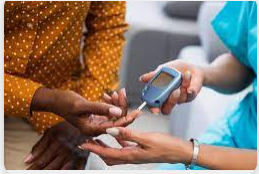

# **Problem Statement**



*   The objective of this diabetes datasets is to predict whether patient has diabetes or not.
*   The datasets consists of several medical predictor (Independent) variables and one target variable (outcome).


*   Predictor variables includes; Pregnancies, Glucose, Blood Pressure, Skin Thickness, Insulin, BMI, DiabetesPedigreeFunction, age, and outcome.





# **Import Libraries**


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving diabetes.csv to diabetes.csv
User uploaded file "diabetes.csv" with length 23875 bytes


# **Load Dataset**

In [3]:
df = pd.read_csv("diabetes.csv")

# **Exploratory Data Analysis**

In [4]:
df.head(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74              0        0  25.6   
6            3       78             50             32       88  31.0   
7           10      115              0              0        0  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96              0        0   0.0   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
5                     0.201   30        0  
6                     0.248   26        1  
7                     0.134   29        0  
8                     0.158   53        1  
9                     0.232   54        1

In [5]:
df.sample(10)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
557            8      110             76              0        0  27.8   
359            1      196             76             36      249  36.5   
356            1      125             50             40      167  33.3   
75             1        0             48             20        0  24.7   
339            7      178             84              0        0  39.9   
208            1       96             64             27       87  33.2   
224            1      100             66             15       56  23.6   
761            9      170             74             31        0  44.0   
408            8      197             74              0        0  25.9   
291            0      107             62             30       74  36.6   

     DiabetesPedigreeFunction  Age  Outcome  
557                     0.237   58        0  
359                     0.875   29        1  
356                     0.962   28        1  
75                      0.140   22        0  
339                     0.331   41        1  
208                     0.289   21        0  
224                     0.666   26        0  
761                     0.403   43        1  
408                     1.191   39        1  
291                     0.757   25        1

In [6]:
df.tail(5)

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [7]:
#number of rows and columns
df.shape

(768, 9)

No. of columns = 768
No. of rows = 9

In [8]:
#list the types of all columns
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
#finding out of the dataset contains any null value
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**The dataset has no null values.**

In [10]:
#statistical summary
df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [11]:
# Total number of patients with and without diabetes
diabetes = df["Outcome"].value_counts()[1]
no_diabetes = df["Outcome"].value_counts()[0]

print (f"There are {diabetes} number of patients with diabetes")
print (f"There are {no_diabetes} number of patients without diabetes")

There are 268 number of patients with diabetes
There are 500 number of patients without diabetes


**Observations**
1. The dataset has 768 patients.
2. There are between 0 and 17 pregnancies in the sample, with an average pregnancy rate of 3.84.
3. The range of glucose levels is 0 to 199, with the average value being 120.89.
4. The average blood pressure is 69.11, with the lowest and highest readings being 0 and 122, respectively.
5. The large standard deviation of 115.24 for insulin suggests that the dataset has a diverse range of values, indicating that the patients' insulin levels vary widely, ranging from 0 to 846 with an average of 79.799.
6. The average BMI is 31.999, with 0 being the lowest and 67 the highest result.
7. The average diabetes pedigree function is 0.47, with the minimum and greatest values being 0.078 and 2.42.
8. The average age of the patients in the sample is 33 years, with a range of 21 to 81 years.
9. **Columns with a value of "0"—such as glucose, blood pressure, skin thickness, insulin, and BMI—are likely to be inaccurate because a 0 for these characteristics is medically improbable. These values are probably missing or unreported. In order to indicate that they are missing, they will be replaced with NaN.**

In [12]:
df.corr()

Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221071                  0.137337   
BloodPressure             0.088933  0.281805                  0.041265   
SkinThickness             0.436783  0.392573                  0.183928   
Insulin                   1.000000  0.197859                  0.185071   
BMI                       0.197859  1.000000                  0.140647   
DiabetesPedigreeFunction  0.185071  0.140647                  1.000000   
Age                      -0.042163  0.036242                  0.033561   
Outcome                   0.130548  0.292695                  0.173844   

                               Age   Outcome  
Pregnancies               0.544341  0.221898  
Glucose                   0.263514  0.466581  
BloodPressure             0.239528  0.065068  
SkinThickness            -0.113970  0.074752  
Insulin                  -0.042163  0.130548  
BMI                       0.036242  0.292695  
DiabetesPedigreeFunction  0.033561  0.173844  
Age                       1.000000  0.238356  
Outcome                   0.238356  1.000000

In [13]:
df.duplicated().sum()

0

The dataset has no duplicates

In [14]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

# **Data Visualization**

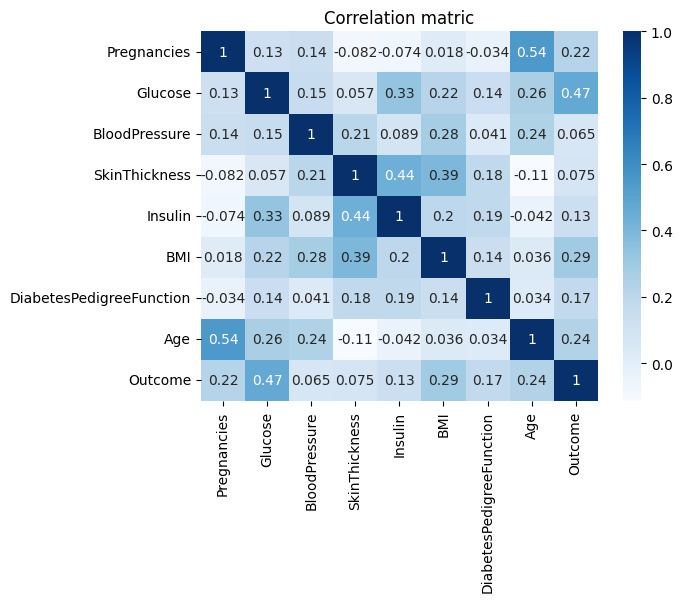

In [15]:
# Heatmap to show visualize correlation
sns.heatmap(df.corr(), annot = True, cmap = "Blues")
plt.title("Correlation matric");

All of the characteristics are positively connected with developing diabetes, according to the correlation matrix above. The most significant positive connection is between glucose and the likelihood of having diabetes, with a coefficient of 0.47 signifying a moderately favourable correlation. In other words, this suggests that people with raised glucose levels have a higher likelihood of having diabetes. The information is vital because it emphasises how important it is to monitor glucose levels because doing so enables early identification and management of diabetes risk.

**Count Plot**

Negative (0):  500
Positive (1):  268


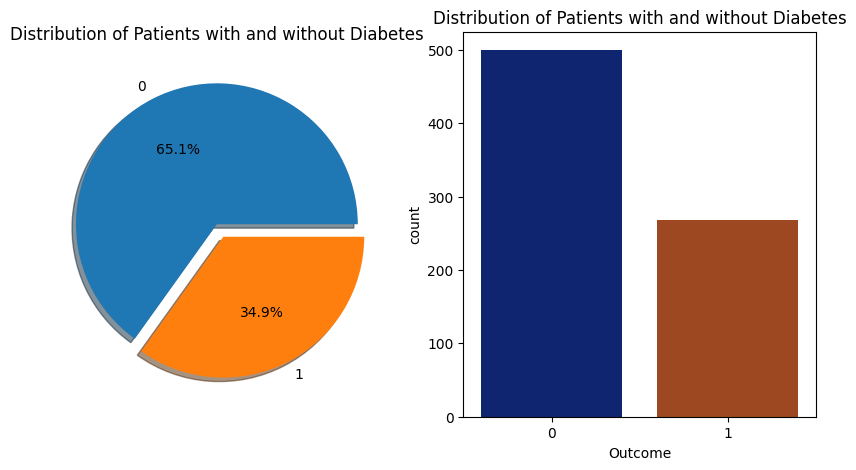

In [16]:
# Outcome count plot
f,ax=plt.subplots(1,2,figsize=(10,5))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Distribution of Patients with and without Diabetes')
ax[0].set_ylabel('')
sns.countplot(x = df["Outcome"], palette = "dark")
ax[1].set_title('Distribution of Patients with and without Diabetes')
N,P = df['Outcome'].value_counts()
print('Negative (0): ',N)
print('Positive (1): ',P)

268 out of 768 people have diabetes (positive (1)), compared to 500 who do not (negative (0)).
The countplot indicates that the dataset is ***imbalanced*** because there are more patients without diabetes than with the disease.

**Visualization of features distribution (Histogram)**

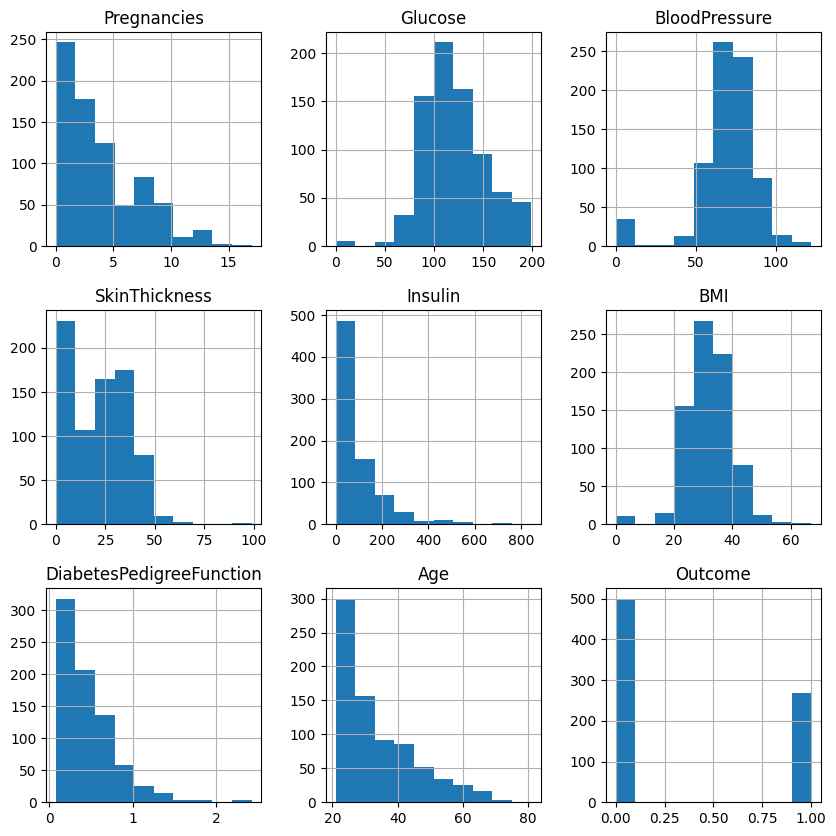

In [17]:
# Histogram of each feature
df.hist(bins=10,figsize=(10,10))
plt.show()

According to the visualisation above, some features contain 0 and are illogical, indicating missing values. So, we substitute NaN for the value of 0.

In [18]:
# Replace the 0 with NaN
df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = (
    df[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.nan))

In [19]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

Dealing with values that are missing, care must be taken while handling missing values. notably with regard to healthcare datasets, where faulty treatment can result in inaccurate predictions and insights that may have grave repercussions.

Model-Based Imputation will be used to replace the missing data in this case. To forecast and impute missing values, we'll utilise k-NN.

In [20]:
from  sklearn.impute import KNNImputer

# Initialize KNNImputer
imputer = KNNImputer(n_neighbors=30)

# Perform imputation on specified columns
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

# Verify imputation
df.sample(5)

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
574            1    143.0           86.0           30.0  330.000000  30.1   
463            5     88.0           78.0           30.0   80.866667  27.6   
231            6    134.0           80.0           37.0  370.000000  46.2   
268            0    102.0           52.0           21.1  109.533333  25.1   
225            1     87.0           78.0           27.0   32.000000  34.6   

     DiabetesPedigreeFunction  Age  Outcome  
574                     0.892   23        0  
463                     0.258   37        0  
231                     0.238   46        1  
268                     0.078   21        0  
225                     0.101   22        0

In [21]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Checking for Outliers**

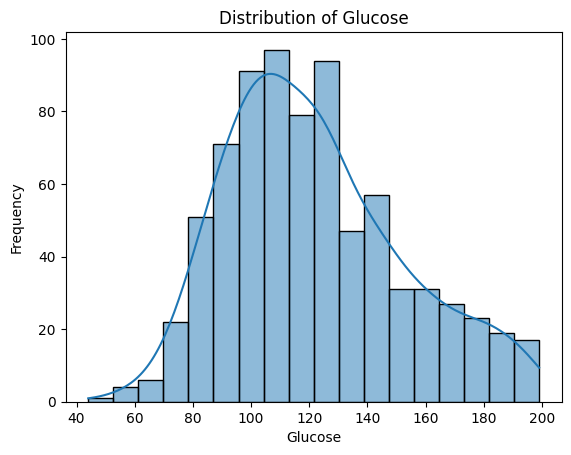

In [22]:
sns.histplot(data =df["Glucose"], kde = 1)
plt.title("Distribution of Glucose")
plt.xlabel("Glucose")
plt.ylabel("Frequency");

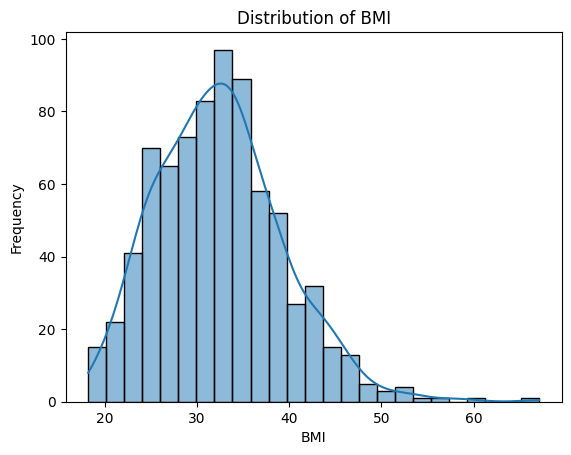

In [23]:
sns.histplot(data =df["BMI"], kde = 1)
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency");

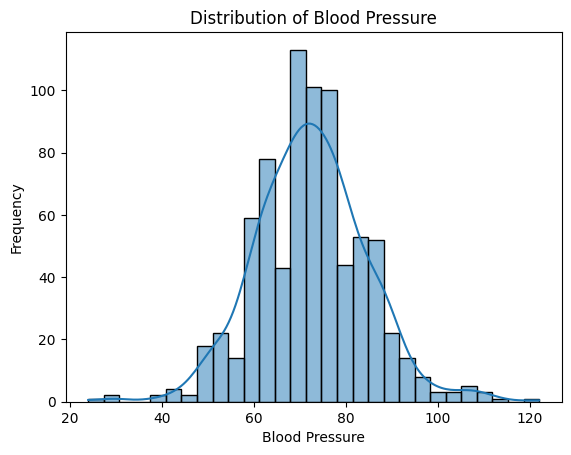

In [24]:
sns.histplot(data =df["BloodPressure"], kde = 1)
plt.title("Distribution of Blood Pressure")
plt.xlabel("Blood Pressure")
plt.ylabel("Frequency");

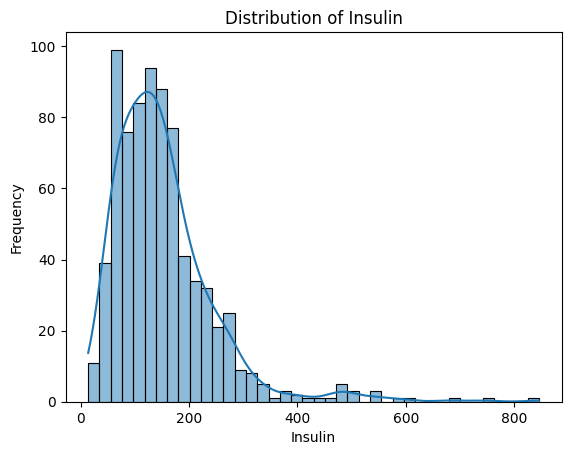

In [25]:
sns.histplot(data =df["Insulin"], kde = 1)
plt.title("Distribution of Insulin")
plt.xlabel("Insulin")
plt.ylabel("Frequency");

**Scatter plot**

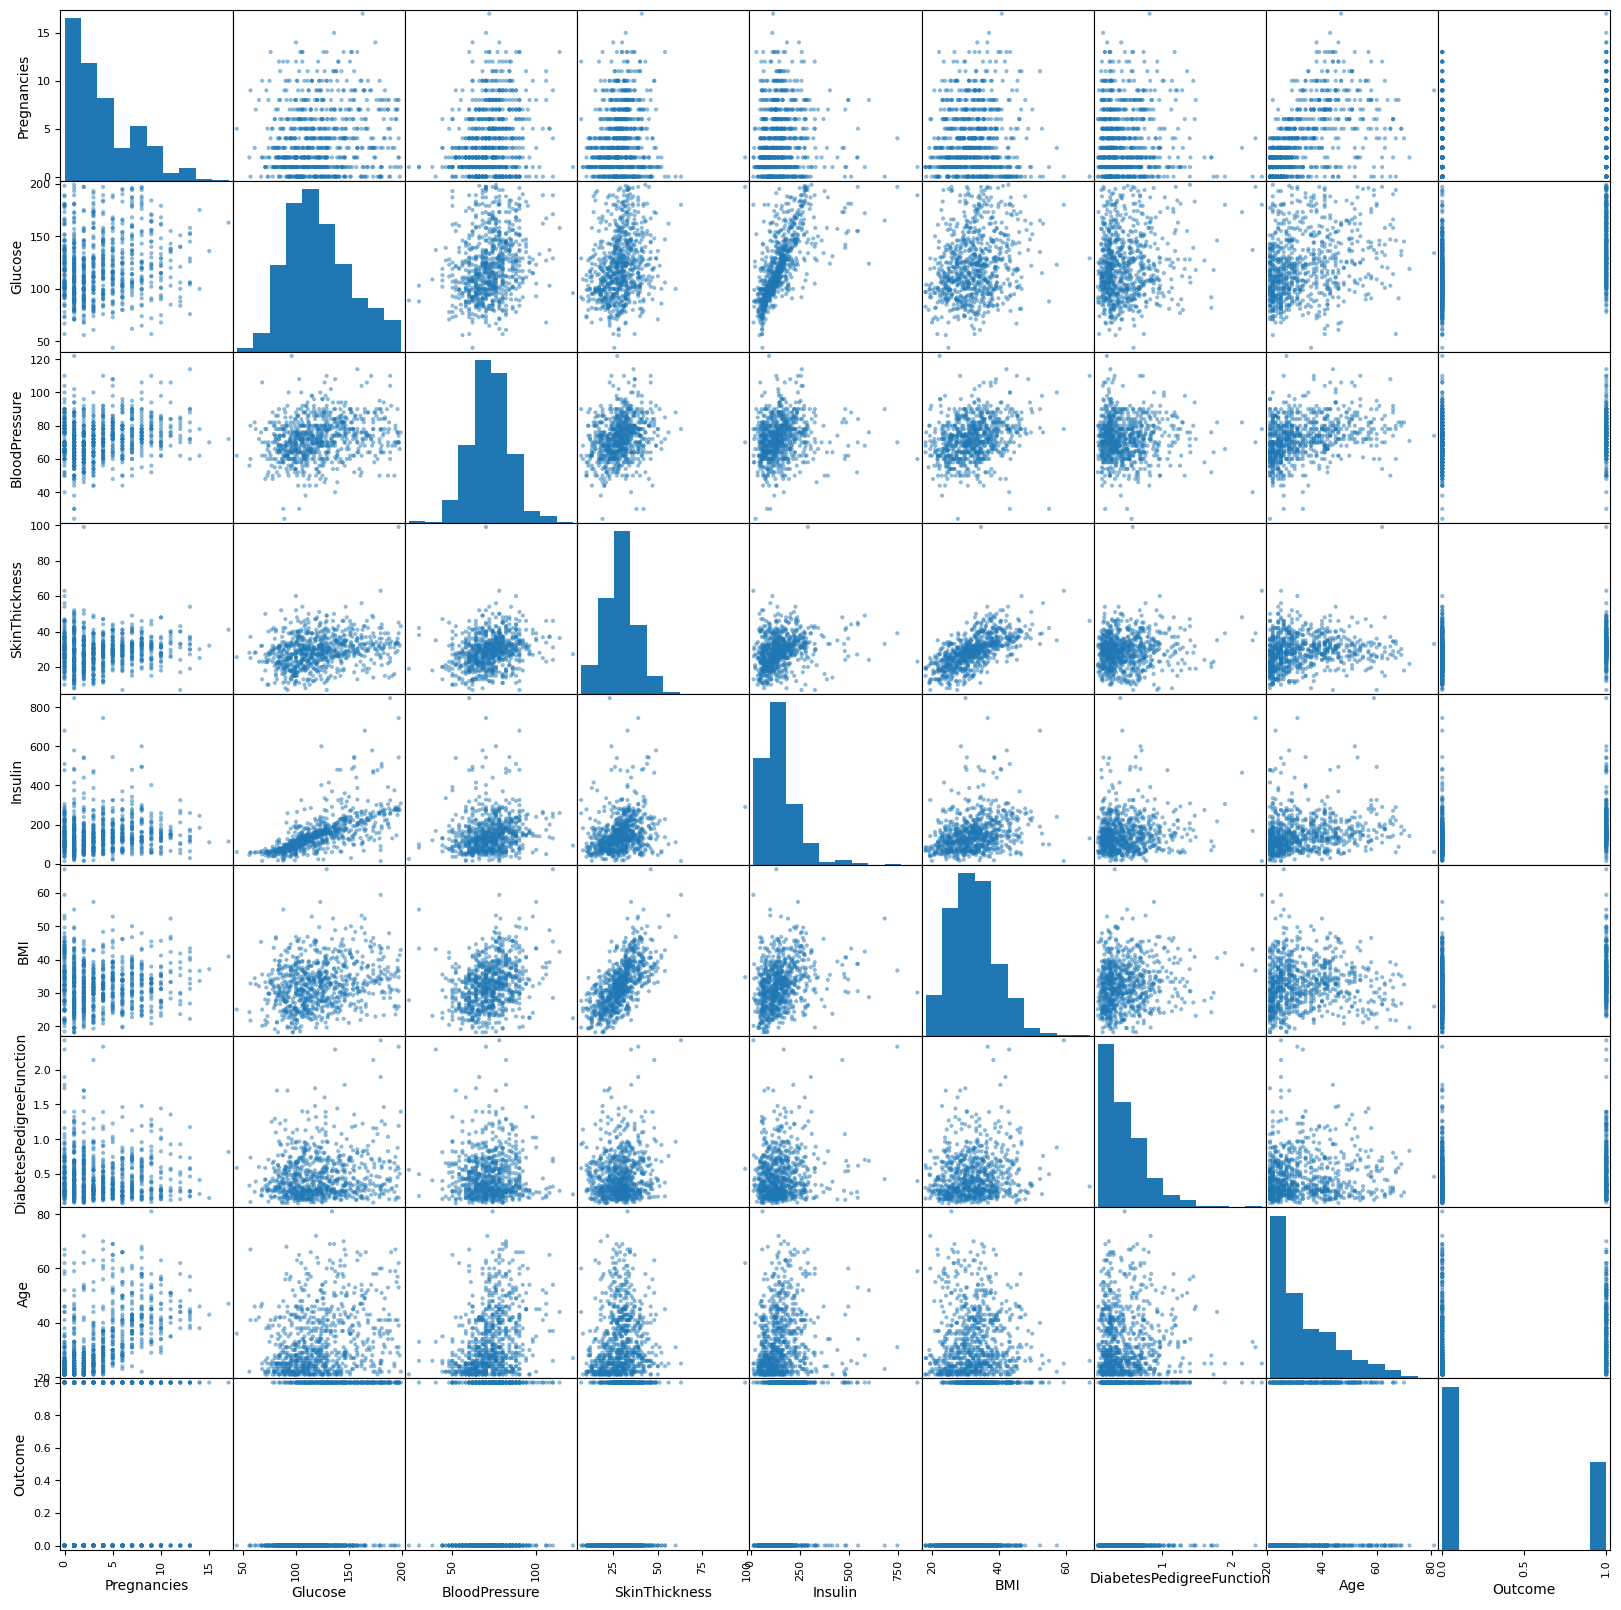

In [26]:
# Scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize = (20, 20));

**Pairplot**

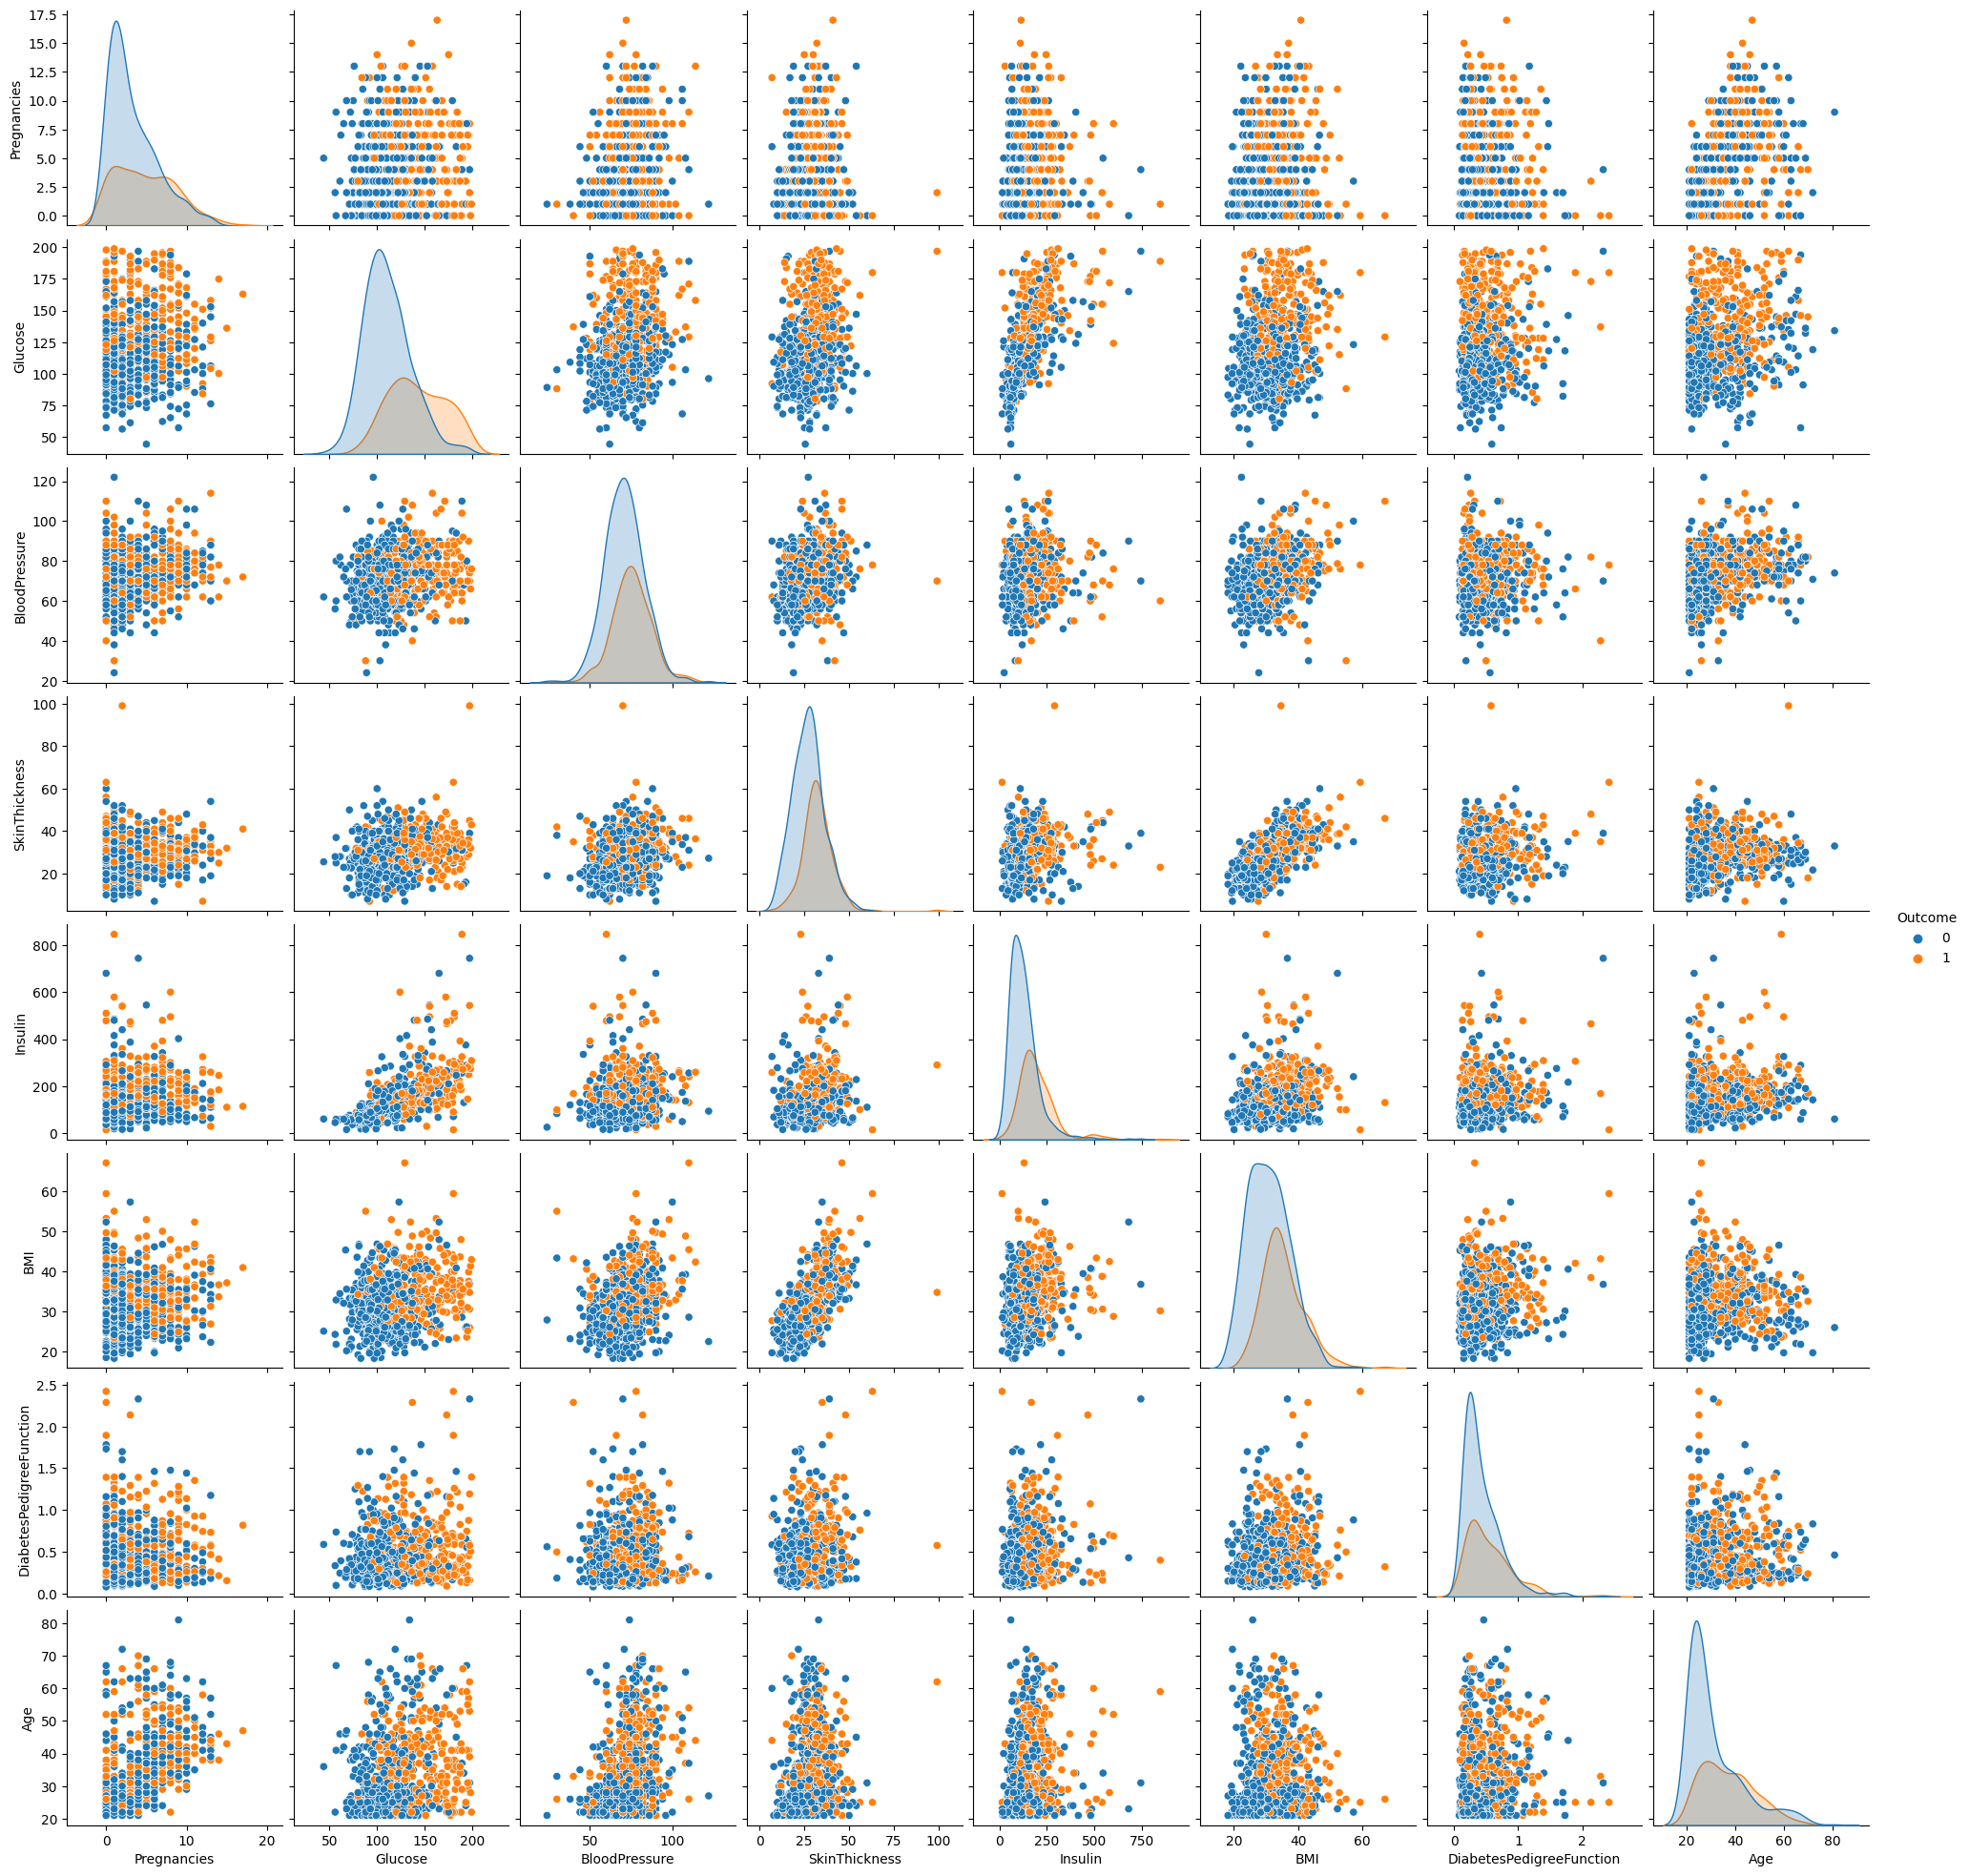

In [27]:
# Pairplot
sns.pairplot(data = df, hue = 'Outcome')
plt.show()

**Split the data frame into X and Y**

In [28]:
target_name = 'Outcome'

# Separate object for target feature
y = df[target_name]

# Separate object for input features
x = df.drop(target_name, axis=1)

In [29]:
x.head()

Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0            6    148.0           72.0      35.000000  222.566667  33.6   
1            1     85.0           66.0      29.000000   64.766667  26.6   
2            8    183.0           64.0      30.766667  268.733333  23.3   
3            1     89.0           66.0      23.000000   94.000000  28.1   
4            0    137.0           40.0      35.000000  168.000000  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33

In [30]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

**Apply Feature Scaling**

In [31]:
from sklearn.preprocessing import StandardScaler

# Copying original dataframe
df_copy = df.copy()

scaler = StandardScaler()
numeric_cols = ["Pregnancies", 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Scalinf the numeric columns
df_copy[numeric_cols] = scaler.fit_transform(df_copy[numeric_cols])

df_copy.head()

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0     0.639947  0.864759      -0.031173       0.656551  0.747414  0.168043   
1    -0.844885 -1.206211      -0.525824      -0.000466 -0.919777 -0.850334   
2     1.233880  2.015298      -0.690707       0.192989  1.235174 -1.330426   
3    -0.844885 -1.074721      -0.525824      -0.657483 -0.610921 -0.632110   
4    -1.141852  0.503161      -2.669308       0.656551  0.170905  1.550126   

   DiabetesPedigreeFunction       Age  Outcome  
0                  0.468492  1.425995        1  
1                 -0.365061 -0.190672        0  
2                  0.604397 -0.105584        1  
3                 -0.920763 -1.041549        0  
4                  5.484909 -0.020496        1

In [32]:
# Select Features
features = df_copy.drop(columns = "Outcome")

# Select Target
target = df["Outcome"]

In [33]:
features.shape

(768, 8)

In [34]:
target.shape

(768,)

In [35]:
# Splittng the dataset into test and train
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    shuffle = True,
                                                    test_size = 0.2,
                                                    random_state = 0)

**Data Modelling**

In [36]:
from sklearn.ensemble import RandomForestClassifier

# Building Random Forest Model
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [37]:
# Predicting using the X_test
y_predict = clf.predict(X_test)

In [38]:
from sklearn import metrics

In [39]:
# Evaluating the model's performance
acc_score = metrics.accuracy_score(y_test, y_predict)
prec_score = metrics.precision_score(y_test, y_predict)
rec_score = metrics.recall_score(y_test, y_predict)
f1Score = metrics.f1_score(y_test, y_predict)
con_matrix = metrics.confusion_matrix(y_test, y_predict)
class_report = metrics.classification_report(y_test, y_predict)

print (f"The accuracy score of the model is {acc_score * 100:.2f}%")
print (f"The precision score of the model is {prec_score * 100:.2f}%")
print (f"The recall score of the model is {rec_score * 100:.2f}%")
print (f"The f1 score of the model is {f1Score * 100:.2f}%")
print (f"The confusion matrix is\n {con_matrix}")
print (f"Classification Report is\n {class_report}")

The accuracy score of the model is 81.82%
The precision score of the model is 69.39%
The recall score of the model is 72.34%
The f1 score of the model is 70.83%
The confusion matrix is
 [[92 15]
 [13 34]]
Classification Report is
               precision    recall  f1-score   support

           0       0.88      0.86      0.87       107
           1       0.69      0.72      0.71        47

    accuracy                           0.82       154
   macro avg       0.79      0.79      0.79       154
weighted avg       0.82      0.82      0.82       154



1. The accuracy score is a measurement of the model's overall correctness, and a score of 81.82% means the model accurately predicts the result about 82% of the time, indicating a trustworthy model.
2. The proportion of accurately predicted positive observations to all expected positive observations is known as the precision score. A precision of 69.39% indicated that the model is accurate around 69.39% of the time when predicting a positive class (for instance, diabetic).
3. A recall score of 72.34% indicates that the model properly detects almost 72% of all actual positive instances. Recall score is the ratio of correctly predicted positive observations to all actual positives.
4. It is essential in situations when the cost of a False Negative is substantial, such as in medical diagnosis where the failure to recognise a condition can have negative effects.
5. The F1 Dcore is a better metric when there is an uneven class distribution since it is the harmonic mean of Precision and Recall. A balanced model is suggested by an F1 Score of 70.83%.

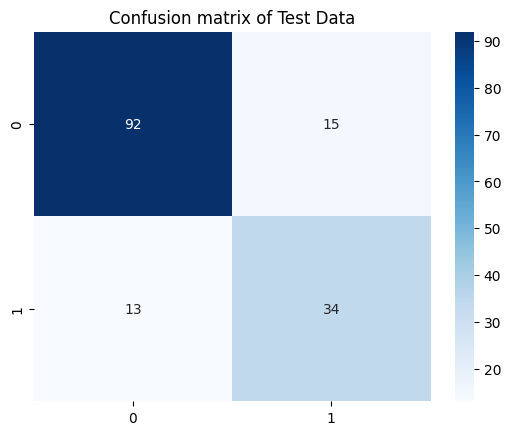

In [40]:
sns.heatmap(data = con_matrix, annot = True, cmap = "Blues")
plt.title("Confusion matrix of Test Data");

**The confusion matrix is as follows:**

True Negative (TN) = 92
False Positive (FP) = 13
False Negative (FN) = 15
True Positive (TP) = 34

**True Negative (92):** The model correctly predicted the class of non-diabetic patients.
**True Positive (34):** The model correctly predicted the class of diabetic patients.
**False Positive (13):** The model incorrectly predicted as diabetic.
**False Negative (15):** The model incorrectly predicted as non-diabetic.

# **Feature Importance**

Text(0.5, 1.0, 'Feature Importance')

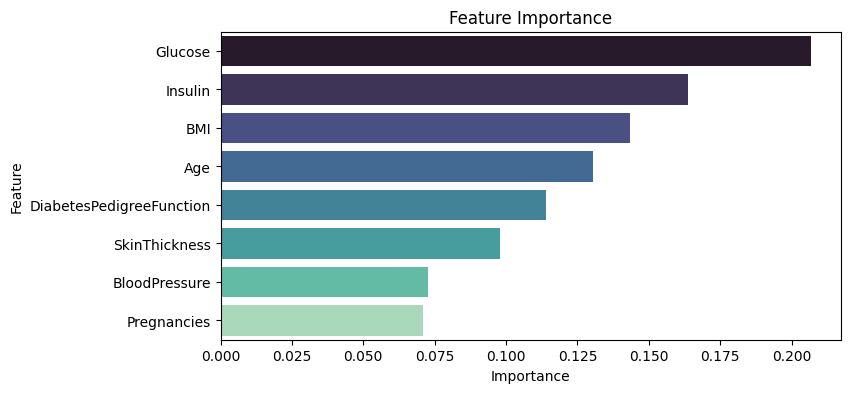

In [41]:
# Get feature importance
feature_importances = clf.feature_importances_

# Create a DataFrame for feature importances
df_feature_importance = pd.DataFrame({'feature': numeric_cols, 'importance': feature_importances})

# Sort the DataFrame by importance
df_feature_importance = df_feature_importance.sort_values(by='importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(8,4))
sns.barplot(data = df_feature_importance, y= df_feature_importance['feature'],
           x =df_feature_importance['importance'], palette = "mako")
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

In [42]:
df_feature_importance

feature  importance
1                   Glucose    0.206817
4                   Insulin    0.163783
5                       BMI    0.143374
7                       Age    0.130551
6  DiabetesPedigreeFunction    0.114163
3             SkinThickness    0.097807
2             BloodPressure    0.072571
0               Pregnancies    0.070933

1. Understanding which features are responsible for the predictions is made easier with the help of feature importance, which sheds light on the model's decision-making process.
2. **Glucose** has the greatest value of **0.206817**, indicating that it is the attribute that most significantly influences the outcome. As glucose levels are a significant predictor of diabetes, this is in line with medical knowledge.
3. With importance ratings of 0.163783 and 0.143374, respectively, BMI and insulin rank as the second and third most crucial characteristics, indicating that they are likewise crucial to the model's predictions. A high BMI is frequently linked to a higher chance of developing diabetes, and the level of insulin also has a significant impact on diabetes.
4. The moderate significance ratings for **Age** and **DiabetesPedigreeFunction** are 0.130551 and 0.114163, respectively. Information regarding the history of diabetes in a person's family and genetic risk is provided by the DiabetesPedigreeFunction.
5. Although skin thickness, blood pressure, and pregnancy do factor into the model's choice, their influence is less than that of other characteristics, as seen by their lower significance scores, which range from 0.097807 to 0.070933. Insulin resistance and glucose metabolism may be impacted by the number of pregnancies.

In [43]:
# Feature prediction
df["outcome_prediction"] = clf.predict(features)

# Saving the dataframe into a csv file
df.to_csv("diabtes_prediction.csv", index = False)

**# Save the Model**

In [44]:
from joblib import dump, load

# saving model
dump(clf, 'diabetes_prediction.joblip')

['diabetes_prediction.joblip']

**# Conclusion**

The model's generally high accuracy indicates its dependability, but its precision, recall, and F1 score indicate that it could do better at properly categorising positive events and minimising both sorts of errors.

The amount of False Negatives (15) is alarming, especially when it comes to medical diagnostics because it represents situations where the model missed diagnosing a positive condition (such as diabetes) and may have resulted in missed diagnoses.

The model also contains a modest number of False Positives (13), which represent situations in which people are mistakenly diagnosed with the illness, resulting in unneeded stress and medical procedures.

**Project done by:**
Lindy Esessien Ogundokun
              